In [1]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [2]:
def load_mnist(path, kind='train'):
    import os
    import gzip
    import numpy as np

    """Load MNIST data from `path`"""
    labels_path = os.path.join(path,
                               '%s-labels-idx1-ubyte.gz'
                               % kind)
    images_path = os.path.join(path,
                               '%s-images-idx3-ubyte.gz'
                               % kind)

    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,
                               offset=8)

    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(labels), 784)

    return images, labels

In [3]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

X_train, y_train = load_mnist('/content/gdrive/MyDrive/ML/fashionmnist', kind='train')
X_test, y_test = load_mnist('/content/gdrive/MyDrive/ML/fashionmnist', kind='t10k')

# Quebrando em dados de validação 20% e test 80%
X_validation = X_test[:160]
y_validation = y_test[:160]
X_test = X_test[160:]
y_test = y_test[160:]

# Métricas e valores para k

In [4]:
k_values = range(1, 30)

accuraciesEuc = []
accuraciesMan = []
accuraciesMin = []

### Treinando o modelo utilizando a metrica = "euclidean"

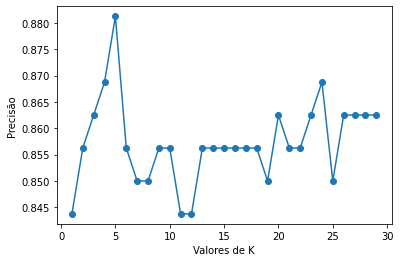

In [5]:
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors = k, metric = "euclidean")
    knn.fit(X_train, y_train)
    # Avaliando precisão do modelo e atualizando lista de precisão
    score = knn.score(X_validation, y_validation)
    accuraciesEuc.append(score)

# Mostrando a precisão com os dados de validação utilizando um gráfico
plt.plot(k_values, accuraciesEuc, marker = 'o')
plt.xlabel("Valores de K")
plt.ylabel("Precisão")
plt.show()

### Treinando o modelo utilizando a metrica = "manhattan"

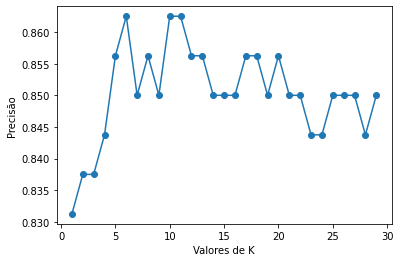

In [6]:
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors = k, metric = "manhattan")
    knn.fit(X_train, y_train)
    # Avaliando precisão do modelo e atualizando lista de precisão
    score = knn.score(X_validation, y_validation)
    accuraciesMan.append(score)

# Mostrando a precisão com os dados de validação utilizando um gráfico
plt.plot(k_values, accuraciesMan, marker = 'o')
plt.xlabel("Valores de K")
plt.ylabel("Precisão")
plt.show()

### Treinando o modelo utilizando a metrica = "minkowski"

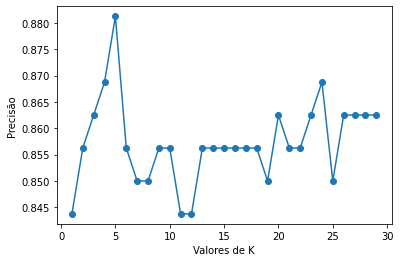

In [7]:
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors = k, metric = "minkowski")
    knn.fit(X_train, y_train)
    # Avaliando precisão do modelo e atualizando lista de precisão
    score = knn.score(X_validation, y_validation)
    accuraciesMin.append(score)

# Mostrando a precisão com os dados de validação utilizando um gráfico
plt.plot(k_values, accuraciesMin, marker = 'o')
plt.xlabel("Valores de K")
plt.ylabel("Precisão")
plt.show()

Encontrando o melhor valor de K e a melhor métrica

In [8]:
import numpy as np

# euclidean best K
arr = np.array(accuraciesEuc)
index = (arr.argmax() * 2) + 1
best = arr[arr.argmax()]
euclidean = ["euclidean", index, best]

# manhattan best K
arr = np.array(accuraciesMan)
index = (arr.argmax() * 2) + 1
best = arr[arr.argmax()]
manhattan = ["manhattan", index, best]

# minkowski best K
arr = np.array(accuraciesMin)
index = (arr.argmax() * 2) + 1
best = arr[arr.argmax()]
minkowski = ["minkowski", index, best]

maxValue = [euclidean, manhattan, minkowski]
maxValue.sort(key = lambda x: x[2])
bestKM = maxValue[-1]

Treinando utilizando o melhor k e a melhor métrica

In [9]:
knn = KNeighborsClassifier(n_neighbors = bestKM[1], metric = bestKM[0])
knn.fit(X_train, y_train)
# Avaliando precisão do modelo e atualizando lista de precisão
score = knn.score(X_test, y_test)
print(score)

0.8518292682926829
